In [8]:
import os 
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [11]:
p = Path("./Data")

dirs = p.glob("*")

image_data = []
labels = []

# optionals
image_paths = []

labels_dict={"Pikachu":0,"Bulbasaur":1,"Meowth":2 }
label2pokemon = {0:"Pikachu",1:"Bulbasaur",2:"Meowth"}

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1]
    # print(labels)
    cnt = 0
    print(folder_dir)

    # Iterate over folder_dir and pick all images of the pokemon
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(100,100))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        cnt += 1
    print(cnt)

Data/Pikachu
29
Data/Meowth
70
Data/Bulbasaur
174


In [5]:
p = Path("./Data/")

dirs = p.glob("*")

for folder_dir in dirs:
    # print(folder_dir)
    print(str(folder_dir).split("/")[-1])
    

Pikachu
Meowth
Bulbasaur


In [9]:
print(len(image_data))
print(len(labels))

273
273


In [10]:
X = np.array(image_data)
Y = np.array(labels)

print(X.shape)
print(Y.shape)

(273, 100, 100, 3)
(273,)


In [12]:
# Draw some pokemons
def drawImg(img,label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.show()

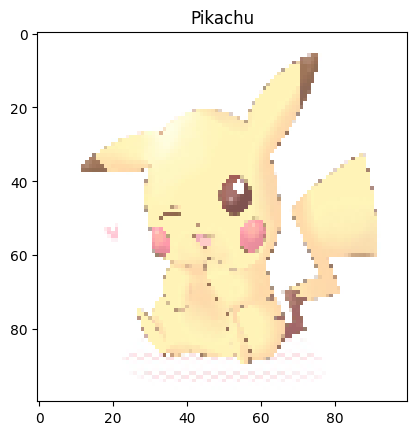

In [16]:
drawImg(X[0]/255.0,Y[0])

In [ ]:
for i in range(10):
    r = np.random.randint(200)
    drawImg(X[r]/255.0,Y[r])

In [18]:
# Creating Training and Test Data
split = int(X.shape[0]*.8)

X_ = np.array(X)
Y_ = np.array(Y)

# Training Set
X = X_[:split,:]
Y = Y_[:split]

#Test Set
XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(218, 100, 100, 3) (218,)
(55, 100, 100, 3) (55,)
